# Stereo 

A script for implementing stereo algorithms 1, 2, and 3 from the lecture slides

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [72]:
# RGB to gray
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [73]:
def stereo1(img1, img2, dispRange):
    # Load in both images, assumed to be RGBA 8bit per channel images
    left = img1
    right = img2    
    w, h = left.shape  # assume that both images are same size   
    
    # Depth (or disparity) map
    depth = np.zeros((w, h), np.uint8)
    depth.shape = h, w
    
    kernel_half = int(windowSize / 2)    
    offset_adjust = 255 / dispRange  # this is used to map depth map output to 0-255 range
      
    for y in range(h):      
        print(".", end="", flush=True)  # let the user know that something is happening (slowly!)
        
        for x in range(w):
            best_offset = 0
            prev_ssd = 65534
            
            for offset in range(dispRange):               
                ssd = 0
                ssd_temp = 0                            
                
                # v and u are the x,y of our local window search, used to ensure a good 
                # match- going by the squared differences of two pixels alone is insufficient, 
                # we want to go by the squared differences of the neighbouring pixels too
                for v in range(1):
                    for u in range(1):
                        # iteratively sum the sum of squared differences value for this block
                        # left[] and right[] are arrays of uint8, so converting them to int saves
                        # potential overflow, and executes a lot faster 
                        ssd_temp = int(left[y+v, x+u]) - int(right[y+v, (x+u) - offset])  
                        ssd += ssd_temp * ssd_temp              
                
                # if this value is smaller than the previous ssd at this block
                # then it's theoretically a closer match. Store this value against
                # this block..
                if ssd < prev_ssd:
                    prev_ssd = ssd
                    best_offset = offset
                            
            # set depth output for this x,y location to the best match
            depth[y, x] = best_offset * offset_adjust
                                
    return depth

In [75]:
def stereo2(img1, img2, dispRange, windowSize):
    i=0
    # Load in both images, assumed to be RGBA 8bit per channel images
    left = img1
    right = img2    
    w, h = left.shape  # assume that both images are same size   
    
    # Depth (or disparity) map
    depth = np.zeros((w, h), np.uint8)
    depth.shape = h, w
       
    kernel_half = int(windowSize / 2)    
    offset_adjust = 255 / dispRange  # this is used to map depth map output to 0-255 range
    print(f"image size\t: {w},{h}\nkernel_half\t: {kernel_half}\nh - kernel_half\t: {h-kernel_half}\nw - kernel_half\t: {w-kernel_half}") 
    for y in range(kernel_half, h - kernel_half):      
        print(".", end="", flush=True)  # let the user know that something is happening (slowly!)
        
        for x in range(kernel_half, w - kernel_half):
            best_offset = 0
            prev_ssd = 65534
            
            for offset in range(dispRange):               
                ssd = 0
                ssd_temp = 0                            
                
                # v and u are the x,y of our local window search, used to ensure a good 
                # match- going by the squared differences of two pixels alone is insufficient, 
                # we want to go by the squared differences of the neighbouring pixels too
                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        # iteratively sum the sum of squared differences value for this block
                        # left[] and right[] are arrays of uint8, so converting them to int saves
                        # potential overflow, and executes a lot faster
                        temp_x = y+v
                        temp_y = x+u
                        if y+v >= 380:
                            temp_x = 379
                        if x+u >= 434:
                            temp_y = 433
                        if temp_y<offset:
                            i+=1
                            ssd_temp = int(left[temp_x, temp_y]) - int(right[temp_x, (temp_y)- (offset-i)])
                        else:
                            ssd_temp = int(left[temp_x, temp_y]) - int(right[temp_x, (temp_y) - offset])  
                        ssd += ssd_temp * ssd_temp              
                
                # if this value is smaller than the previous ssd at this block
                # then it's theoretically a closer match. Store this value against
                # this block..
                if ssd < prev_ssd:
                    prev_ssd = ssd
                    best_offset = offset
                            
            # set depth output for this x,y location to the best match
            depth[y, x] = abs(best_offset * offset_adjust)
                                
    return depth

In [76]:
def stereo3(img1, img2, dispRange, windowSize, lamda):
    raise NotImplementedError

In [77]:
img1 = "sawtooth/im2.jpg"
img2 = "sawtooth/im6.jpg"

left = rgb2gray(plt.imread(img1))
right = rgb2gray(plt.imread(img2))


windowSize = 6
dispRange = 30

disperity_map1 = stereo2(left, right, dispRange, windowSize)  # 6x6 local search kernel, 30 pixel search range
disperity_map2 = stereo2(right, left, dispRange, windowSize)

image size	: 380,434
kernel_half	: 3
h - kernel_half	: 431
w - kernel_half	: 377
.

IndexError: index 434 is out of bounds for axis 1 with size 434

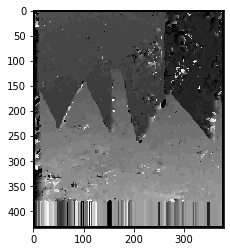

In [54]:
plt.imshow(disperity_map1, cmap='gray')

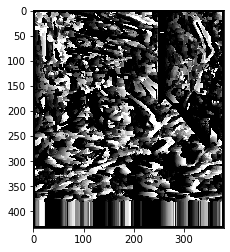

In [55]:
plt.imshow(disperity_map2,cmap='gray')

In [65]:
disperity_map2.shape

(434, 380)

In [63]:
left.shape

(380, 434)